# Twitter & Reddit sentiment data analysis

## Required libraries 

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import tensorflow as tf
from tensorflow.keras import initializers, preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import keras

In [2]:
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## loading datasets

In [3]:
twitter_df=pd.read_csv('/content/Twitter_Data.csv')
reddit_df=pd.read_csv('/content/Reddit_Data.csv')

## number of rows & cols in dataset 

In [4]:
print("number of rows and columns in Twitter dataset: ",twitter_df.shape)
print("number of rows and columns in reddit dataset shape: ",reddit_df.shape)

number of rows and columns in Twitter dataset:  (162980, 2)
number of rows and columns in reddit dataset shape:  (37249, 2)


## sample rows of twitter & reddit dataset 

In [5]:
print("sample data from Twitter sentiment dataset:\n==========================================")
twitter_df.head()

sample data from Twitter sentiment dataset:


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [6]:
print("sample data from Reddit sentiment dataset:\n==========================================")
reddit_df.head()

sample data from Reddit sentiment dataset:


,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


## column names of twitter & reddit dataset 

In [7]:
print("columns in twitter dataset: ", twitter_df.columns)
print("columns in reddit dataset: ", reddit_df.columns)

columns in twitter dataset:  Index(['clean_text', 'category'], dtype='object')
columns in reddit dataset:  Index(['clean_comment', 'category'], dtype='object')


## changing clean_text & clean_comment ==> raw_comment

In [8]:
twitter_df=twitter_df.rename(columns={"clean_text":"raw_comment"})
reddit_df=reddit_df.rename(columns={"clean_comment":"raw_comment"})

## merging both dataset into one dataset

In [9]:
sentiment_df=pd.concat([twitter_df, reddit_df], ignore_index=True)

In [10]:
print("sample data from df dataset: ")
sentiment_df.head()

sample data from df dataset: 


,raw_comment,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


## shape of sentiment_df 

In [11]:
print("numbers of rows and columns in df: ",sentiment_df.shape)

numbers of rows and columns in df:  (200229, 2)


## random selection of 35% of sentiment_df

In [12]:
sentiment_df = sentiment_df.sample(frac=0.35 , ignore_index=True)

In [13]:
print("sample data from df dataset: ")
sentiment_df.head()

sample data from df dataset: 


,raw_comment,category
0,but all fair under modi code conduct,1.0
1,congress disheartened indias progress says mod...,0.0
2,first describe hypothetical situation and then...,1.0
3,fact findings ghastliness unemployment scare r...,0.0
4,pls guys get sane remember the job exceedingly...,-1.0


## basic info about sentiment_df 

In [14]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70080 entries, 0 to 70079
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   raw_comment  70035 non-null  object 
 1   category     70079 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.1+ MB


## 5 number summary of sentiment_df 

In [15]:
print("5 number summary about sentiment_df: ")
sentiment_df.describe()

5 number summary about sentiment_df: 


,category
count,70079.000000
mean,0.220023
std,0.781216
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [16]:
print("numbers of rows and columns in df: ",sentiment_df.shape)

numbers of rows and columns in df:  (70080, 2)


## null enteries treatment in dataset 

In [17]:
print("Number of null enteries in df:\n==============================")
sentiment_df.isnull().sum()

Number of null enteries in df:


raw_comment    45
category        1
dtype: int64

In [18]:
sentiment_df.dropna(inplace=True)

In [19]:
print("sentiment_df after null enteries treatment:\n=================================")
if sentiment_df.empty:
    sentiment_df.isnull().sum()
else:
    print("0 null enteries")
print("number of rows and columns: ", sentiment_df.shape)

sentiment_df after null enteries treatment:
0 null enteries
number of rows and columns:  (70034, 2)


## reducing size of dataset

In [20]:
sentiment_df = sentiment_df.astype({'category':'int8'})

## size taken by dataframe 

In [21]:
print("how much memory use sentiment_df: \n")
sentiment_df.info(verbose=False, memory_usage='deep')

how much memory use sentiment_df: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70034 entries, 0 to 70079
Columns: 2 entries, raw_comment to category
dtypes: int8(1), object(1)
memory usage: 14.7 MB


##  counts of each category

In [22]:
print("total different classes and their frquency in category column:\n==============================================================")
print("class\tfrequency")
sentiment_df["category"].value_counts()

total different classes and their frquency in category column:
class	frequency


 1    30790
 0    23874
-1    15370
Name: category, dtype: int64

## Data visualization

[]

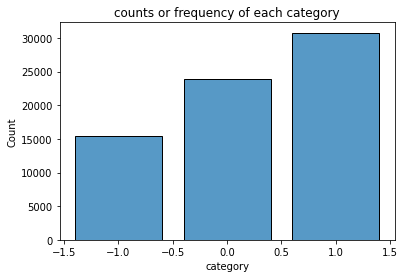

In [23]:
plot1 = sns.histplot(data=sentiment_df['category'],discrete=True, shrink=.8).set_title("counts or frequency of each category")
plt.plot()

In [24]:
comment_len=[]
for i in sentiment_df['raw_comment']:
  l=list(str(i).split(" "))
  comment_len.append(len(l))

temp_df=pd.DataFrame(data={"lengths":comment_len, 'category':sentiment_df['category']})
temp_df

,lengths,category
0,7,1
1,8,0
2,37,1
3,25,0
4,40,-1
...,...,...
70075,13,-1
70076,12,0
70077,12,0
70078,4,0


[]

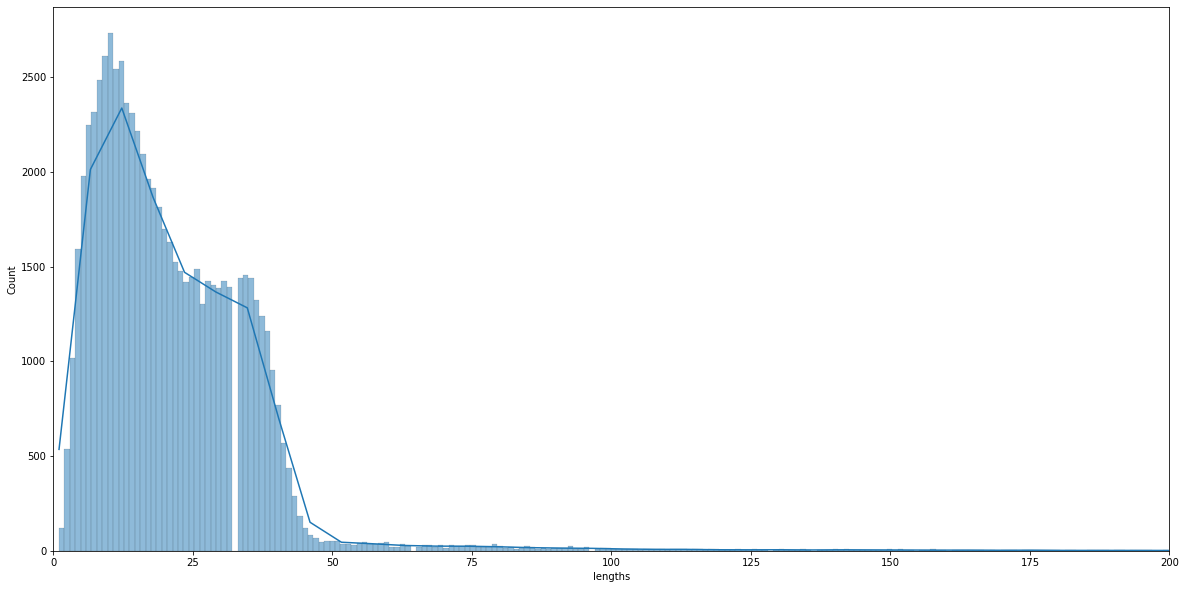

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(temp_df['lengths'], kde=True)
plt.xlim(0, 200)
plt.plot()

## lemmatizing words of comments 

In [26]:
lemmatizer = WordNetLemmatizer()

corpus = []
for i in df['raw_comment']:
  comment=re.sub('[^a-zA-Z]', " ", str(i))
  comment = comment.lower()
  comment = comment.split()

  comment=[lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in comment if not word in stopwords.words('english')]
  comment=' '.join(comment)
  corpus.append(comment)

In [27]:
for i in range(len(sentiment_df['raw_comment'])):
  raw_comment = sentiment_df['raw_comment'].iloc[i]  
  comment=re.sub('[^a-zA-Z]', " ", str(raw_comment))
  comment = comment.lower()
  comment = comment.split()
  comment=[lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in comment if not word in stopwords.words('english')]
  clean_comment = ' '.join(comment)
  sentiment_df['raw_comment'].iloc[i] = clean_comment

<ipython-input-27-97484ceac94e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['raw_comment'].iloc[i] = clean_comment


## finding maximum length of comments

In [28]:
comments = sentiment_df['raw_comment'].values

In [29]:
lenghts = []
for comment in comments:
    lenghts.append(len(comment))
print("Maximum length comment: ", max(lenghts))

Maximum length comment:  5424


## Tokenize each string of list  

In [30]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(sentiment_df['raw_comment'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 58732 unique tokens.


In [37]:
maxl = 3000
X = tokenizer.texts_to_sequences(sentiment_df['raw_comment'].values)
X = pad_sequences(X, maxlen=maxl)

In [38]:
Y = pd.get_dummies(sentiment_df['category'],columns=["category"]).values

## converting x & y train, test data 

In [39]:
from sklearn.model_selection import train_test_split
train_x, test_x , train_y, test_y = train_test_split(X, Y, test_size=.3)

In [40]:
lb = LabelBinarizer().fit(list(set(sentiment_df['category'].tolist())))

In [35]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, Embedding, LSTM, Bidirectional

In [36]:
tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [41]:
with tpu_strategy.scope():
  model = Sequential()
  model.add(Embedding(1000, 100, input_length=maxl))
  model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(3, activation='sigmoid'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3000, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 180,703
Trainable params: 180,703
Non-trainable params: 0
_________________________________________________________________


In [ ]:
histiry = model.fit(train_x, train_y, epochs=5, validation_data=[test_x , test_y])

Epoch 1/5
1532/1532 [==============================] - 1098s 712ms/step - loss: 0.6539 - accuracy: 0.7357 - val_loss: 0.5663 - val_accuracy: 0.7830
Epoch 2/5
1532/1532 [==============================] - 1084s 708ms/step - loss: 0.5540 - accuracy: 0.7876 - val_loss: 0.5512 - val_accuracy: 0.7897
Epoch 3/5
1532/1532 [==============================] - 1085s 708ms/step - loss: 0.5405 - accuracy: 0.7920 - val_loss: 0.5491 - val_accuracy: 0.7895
Epoch 4/5
 914/1532 [================>.............] - ETA: 6:58 - loss: 0.5231 - accuracy: 0.7970